***BREAST CANCER ANALYISIS***
Breast cancer is a cancer that forms in the cells of the breast. Breast 
cancer can occur in women and rarely in men. It requires a medical 
diagnosis, through lab tests or imaging.

We have data on patients . The main goal of this notebook is to build a 
machine learning model, that will be able to predict whether a patient will 
survive breast cancer or not.
**Data understanding**
This dataset consists of a group of breast cancer patients, who had 
surgery to remove the tumour. The dataset consists of these variables:
1)Patient_ID: unique identifier id of a patient
2)Age: Age of patient (Years) 
3)Gender: Male/Female.
4)Protein1, Protein2, Protein3, Protein4: These expression levels are 
biomarker for the dectection of breast cancer.
5)Tumour_Stage: I, II, III. It is a form of staging to describe the 
extensiveness of breast cancer, based on the size of the tumor and its 
spread to the lymph nodes.
6)Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular 
Carcinoma, Mucinous Carcinoma.
7)ER status: Positive/Negative:(Estrogen receptor) the hormone receptor 
determines the type of breast cancer to determine treatment.
8)PR status: Positive/Negative:(Progesterone receptor)the hormone 
receptor determines the type of breast cancer to determine treatment.
9)HER2 status: Positive/Negative.(human epidermal growth factor 
receptor2). This protein promotes the growth of cancer cells .
10)Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical 
Mastectomy, Other surgery type.
11)Date of Surgery: the date the surgery was performed (in DD-MON-YY).
12)Date of Last_Visit: Date of last visit (in DD-MON-YY) to the hospital.
13)Patient_Status: If Alive or Dead



***EDA***
**STEP1: TO UNDERSTAND THE DATASET**



In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
%matplotlib inline

In [2]:
#Reading Dataset
data=pd.read_csv("BRCA.csv")

In [3]:
# inspecting the dataset
#Printing the first 5 rows
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


In [4]:
#Printing the last 5 rows
data.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
329,TCGA-AN-A04A,36,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,9-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,1-Nov-19,4-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,5-Jan-21,Dead


In [5]:
#to find dimensions of the dataset
data.shape

(334, 16)

In [6]:
#Printing information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [7]:
#Viewing the column heading
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [8]:
#to find the types of data,categorical or numerical.
data.dtypes

Patient_ID             object
Age                     int64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object

In [9]:
#description of the dataset.
data.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [10]:
#Inspecting target variable
data.Patient_Status.value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

**STEP2:DATA CLEANING**

In [11]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [12]:
#Removing NULL values
data.dropna(inplace=True)

In [13]:
#Checking whether the NULL values are removed.
data.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [14]:
#Printing new shape of dataset
data.shape

(317, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    int64  
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [16]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool

In [17]:
#Checking whether any duplicate values is present
#data[data.duplicated()]

In [18]:
#Removing unrelevent and unwanted columns
data.drop(columns=["Patient_ID","Date_of_Surgery","Date_of_Last_Visit"], inplace = True)

In [19]:
#checking whether the columns are dropped or not.
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


**OUTLIERS**
Checking for the presence of outliers in numeric columns.

<AxesSubplot:>

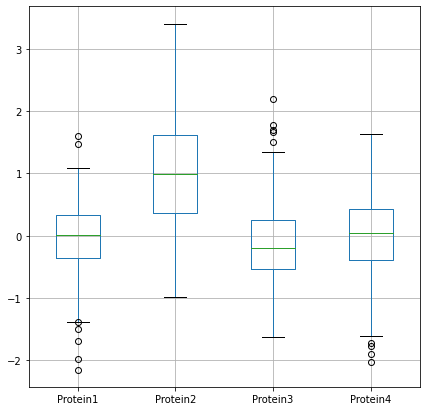

In [20]:
plt.figure(figsize=(7,7))
data.boxplot(column=[ 'Protein1', 'Protein2', 'Protein3', 'Protein4'])

In [21]:
result =data[['Protein1','Protein2','Protein3','Protein4']]

In [22]:
# Finding values of outliers(IQR method)
def detect_outliers_iqr(result):
    outlier_list = []
   
    q1 = np.percentile(result, 25)
    q3 = np.percentile(result, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
   
    for i in result:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list 
for i in result:
    outliers = detect_outliers_iqr(data[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Protein1 attribute : [-1.6828, -1.4872, -2.1446, 1.5936, -1.9711, -1.3882, 1.4704]
Outliers in Protein2 attribute : []
Outliers in Protein3 attribute : [1.7019, 1.7691, 1.6575, 2.1934, 1.507]
Outliers in Protein4 attribute : [-2.0255, -1.7684, -1.8993, -1.7127]


In [23]:
#Now we need to handle these outlier using Quantile based flooring and capping method 
def handle_outliers(result):
    tenth_percentile = np.percentile(result, 10)
    ninetieth_percentile = np.percentile(result, 90)
    b = np.where(result<tenth_percentile, tenth_percentile, result)
    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
for i in result:
    data[i]=handle_outliers(data[i])

<AxesSubplot:>

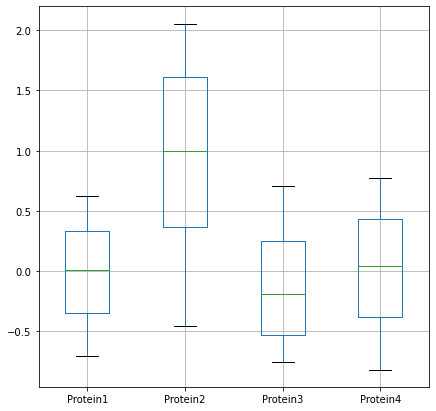

In [24]:
# verifying again with boxplot 
plt.figure(figsize=(7,7)) 
data.boxplot(column=[ 'Protein1', 'Protein2','Protein3','Protein4'])

***Step3-Data Visualization(analysis of relationship between variables/parameters/features)***
In this section, we will get an idea about our patients by considering all the features separately, through graphs.

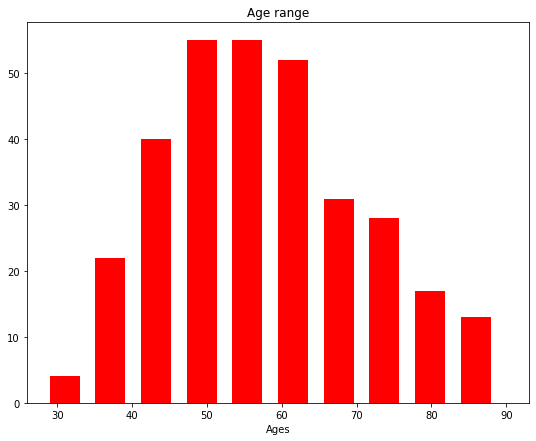

In [83]:
#Univariate Analysis 
#1)AGE
plt.figure(figsize=(9,7))
plt.hist(data['Age'].astype(int),width=4, align='mid',color='red') 
plt.xlabel('Ages') 
plt.title('Age range') 
plt.show()

In [26]:
#2)GENDER
data.Gender.describe()

count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

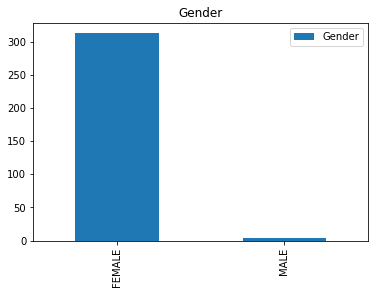

In [27]:
data.Gender.value_counts().plot(kind='bar',title='Gender',legend=True,) 
plt.show()

In [28]:
#3)TUMOUR_STAGE
data["Tumour_Stage"].describe()#Description

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

In [29]:
data["Tumour_Stage"].value_counts()#count

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

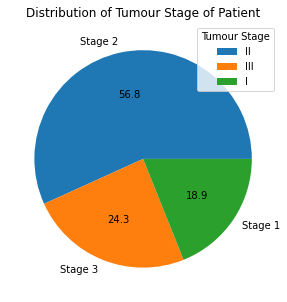

In [30]:
plt.figure(figsize=(5,5))
plt.pie(data['Tumour_Stage'].value_counts(),autopct='%0.1f',labels=['Stage 2','Stage 3','Stage 1'])
plt.title('Distribution of Tumour Stage of Patient')
plt.legend(['II','III','I'],title='Tumour Stage')
plt.show()

In [31]:
#4)HISTOLOGY
data["Histology"].describe()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

In [32]:
data["Histology"].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

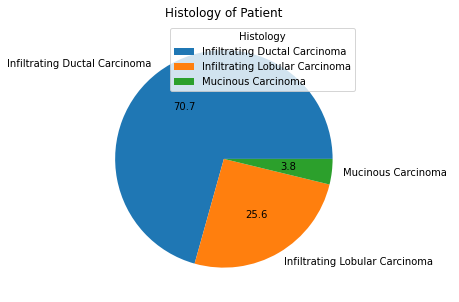

In [33]:
plt.figure(figsize=(5,5))
plt.pie(data['Histology'].value_counts(),autopct='%0.1f',labels=['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma  '])
plt.title('Histology of Patient')
plt.legend(['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma'],title='Histology')
plt.show()

In [34]:
#5)ER STATUS
data['ER status'].describe()

count          317
unique           1
top       Positive
freq           317
Name: ER status, dtype: object

In [35]:
data["ER status"].value_counts()

Positive    317
Name: ER status, dtype: int64

In [36]:
#6)PR STATUS
data['PR status'].describe()

count          317
unique           1
top       Positive
freq           317
Name: PR status, dtype: object

In [37]:
data['PR status'].describe()

count          317
unique           1
top       Positive
freq           317
Name: PR status, dtype: object

In [38]:
#7)HER2 STATUS
data['HER2 status'].describe()

count          317
unique           2
top       Negative
freq           288
Name: HER2 status, dtype: object

In [39]:
data['HER2 status'].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

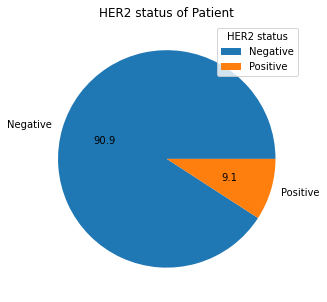

In [40]:
plt.figure(figsize=(5,5))
plt.pie(data['HER2 status'].value_counts(),autopct='%0.1f',labels=['Negative','Positive'])
plt.title('HER2 status of Patient')
plt.legend(['Negative','Positive'],title='HER2 status')
plt.show()

In [41]:
#8)SURGERY_TYPE
data['Surgery_type'].describe()

count       317
unique        4
top       Other
freq         97
Name: Surgery_type, dtype: object

In [42]:
data['Surgery_type'].value_counts()

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

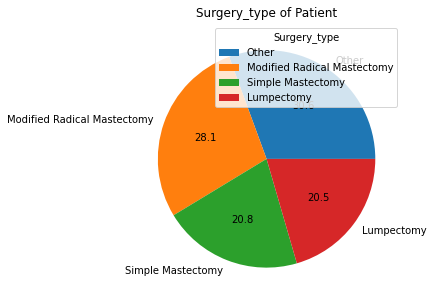

In [43]:
plt.figure(figsize=(5,5))
plt.pie(data['Surgery_type'].value_counts(),autopct='%0.1f',labels=['Other','Modified Radical Mastectomy','Simple Mastectomy','Lumpectomy'])
plt.title('Surgery_type of Patient')
plt.legend(['Other','Modified Radical Mastectomy','Simple Mastectomy','Lumpectomy'],title='Surgery_type')
plt.show()

In [44]:
#9)PATEINT STATUS
data['Patient_Status'].describe()

count       317
unique        2
top       Alive
freq        255
Name: Patient_Status, dtype: object

In [45]:
data['Patient_Status'].value_counts()

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

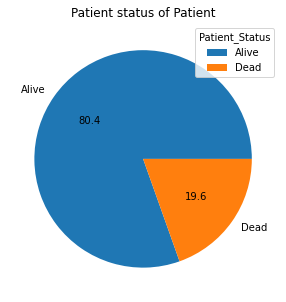

In [46]:
plt.figure(figsize=(5,5))
plt.pie(data['Patient_Status'].value_counts(),autopct='%0.1f',labels=['Alive','Dead'])
plt.title('Patient status of Patient')
plt.legend(['Alive','Dead'],title='Patient_Status')
plt.show()

In [47]:
#Bivariate Analysis
#1)Relationship of Gender and Tumour_Stage
table=pd.crosstab(data['Tumour_Stage'],data['Gender']) 
table

Gender,FEMALE,MALE
Tumour_Stage,,
I,60,0
II,177,3
III,76,1


<AxesSubplot:xlabel='Tumour_Stage'>

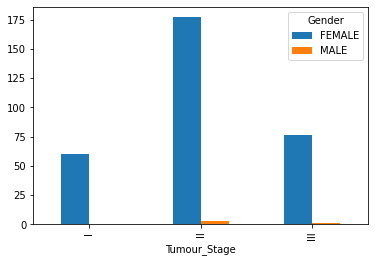

In [48]:
table.plot(kind='bar')

In [49]:
#2)Relationship of gender and Histology
table1=pd.crosstab(data['Histology'],data['Gender']) 
table1

Gender,FEMALE,MALE
Histology,,
Infiltrating Ductal Carcinoma,222,2
Infiltrating Lobular Carcinoma,79,2
Mucinous Carcinoma,12,0


<Figure size 720x720 with 0 Axes>

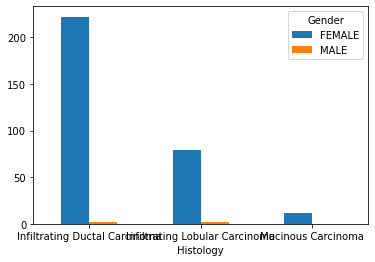

In [89]:
table1.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [51]:
#3)Relationship of Gender and Surgery_type
table2=pd.crosstab(data['Surgery_type'],data['Gender']) 
table2

Gender,FEMALE,MALE
Surgery_type,,
Lumpectomy,66,0
Modified Radical Mastectomy,87,2
Other,96,1
Simple Mastectomy,64,1


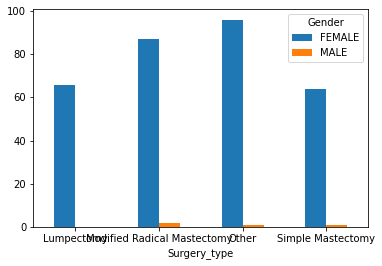

In [90]:
table2.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [53]:
#4)Relationship of Gender and Patient_Status 
table3=pd.crosstab(data['Patient_Status'],data['Gender']) 
table3

Gender,FEMALE,MALE
Patient_Status,,
Alive,252,3
Dead,61,1


<AxesSubplot:xlabel='Patient_Status'>

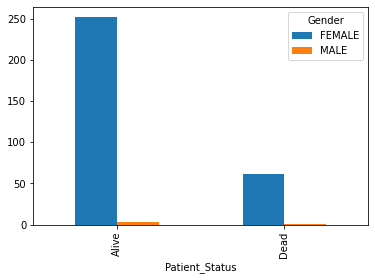

In [54]:
table3.plot(kind='bar')

In [55]:
#5)Relationship of Tumour_Stage and Patient_Status 
table4=pd.crosstab(data['Tumour_Stage'],data['Patient_Status']) 
table4

Patient_Status,Alive,Dead
Tumour_Stage,,
I,51,9
II,144,36
III,60,17


<AxesSubplot:xlabel='Tumour_Stage'>

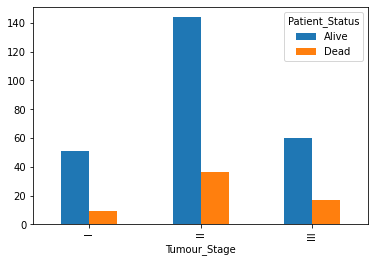

In [56]:
table4.plot(kind='bar')

In [57]:
#6)Relationship of Histology and Patient_Status 
table5=pd.crosstab(data['Histology'],data['Patient_Status']) 
table5

Patient_Status,Alive,Dead
Histology,,
Infiltrating Ductal Carcinoma,179,45
Infiltrating Lobular Carcinoma,67,14
Mucinous Carcinoma,9,3


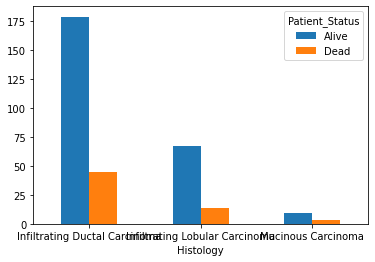

In [91]:
table5.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [59]:
#7)Relationship of Surgery_type and Patient_Status 
table6=pd.crosstab(data['Surgery_type'],data['Patient_Status']) 
table6

Patient_Status,Alive,Dead
Surgery_type,,
Lumpectomy,57,9
Modified Radical Mastectomy,72,17
Other,73,24
Simple Mastectomy,53,12


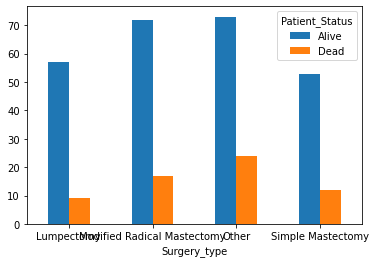

In [92]:
table6.plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

In [61]:
#Multivariate Analysis
# Finding out the correlation between the features
corr = data.corr()
corr

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.013576,-0.016557,-0.038233,0.075576
Protein1,-0.013576,1.000000,0.221397,-0.108978,0.217301
Protein2,-0.016557,0.221397,1.000000,-0.400145,0.086136
Protein3,-0.038233,-0.108978,-0.400145,1.000000,0.084890
Protein4,0.075576,0.217301,0.086136,0.084890,1.000000


In [62]:
corr.shape

(5, 5)

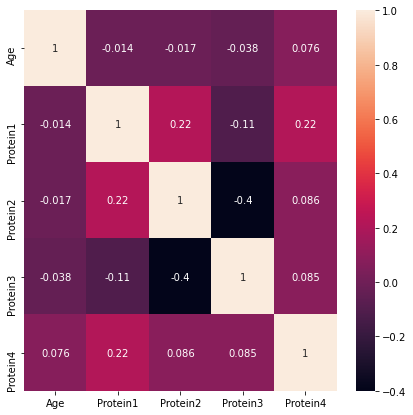

In [63]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(7,7))
dataplot=sns.heatmap(data.corr(),annot=True) 
plt.show()

In [64]:
#Data Preparation(converting categorical values into numerical values.)
data['Tumour_Stage']=data['Tumour_Stage'].map({'I':1,'II':2,'III':3}) 
data['Histology']=data['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,}) 
data['ER status']=data['ER status'].map({'Positive':1})
data['PR status']=data['PR status'].map({'Positive':1})
data['HER2 status']=data['HER2 status'].map({'Positive':1,'Negative':2}) 
data['Gender']=data['Gender'].map({'MALE':1,'FEMALE':2}) 
data['Surgery_type']=data['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4}) 
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36,2,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,Alive
1,43,2,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,Dead
2,69,2,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,Alive
3,56,2,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,Alive
4,56,2,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,Dead


***ALGORITHMS***

In [93]:
#defining x and y variables.
x=data[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]
y=data["Patient_Status"]

In [66]:
#Before applying algorithms in the dataset first we have to split the dataset into two parts i.e train_set and test_set.
from sklearn.model_selection import train_test_split
# Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("Size of training set:", X_train.shape) 
print("Size of training set:", X_test.shape)

Size of training set: (221, 12)
Size of training set: (96, 12)


***1)LOGISTIC REGRESSION***

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_pred0 = logreg.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred0)
print('Confusion matrix:\n',c_matrix)
acc_logreg = round( metrics.accuracy_score(y_test, y_pred0) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )
print(classification_report(y_test,y_pred0))

Confusion matrix:
 [[80  0]
 [16  0]]
Accuracy of Logistic Regression model :  83.33
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Logistic Regression model :  83.33
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [71]:
y_pred2=model.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred2)
print('Confusion matrix:\n',c_matrix)
acc_svm=round(metrics.accuracy_score(y_test,y_pred2)*100,2)
print( 'Accuracy of Support Vector Machine model : ', acc_svm )
print(classification_report(y_test,y_pred2))

Confusion matrix:
 [[80  0]
 [16  0]]
Accuracy of Support Vector Machine model :  83.33
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB()

In [73]:
y_pred3 = model.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred3)
print('Confusion matrix:\n',c_matrix)
acc_nb = round( metrics.accuracy_score(y_test, y_pred3) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )
print(classification_report(y_test,y_pred3))

Confusion matrix:
 [[79  1]
 [16  0]]
Accuracy of Gaussian Naive Bayes model :  82.29
              precision    recall  f1-score   support

       Alive       0.83      0.99      0.90        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.82        96
   macro avg       0.42      0.49      0.45        96
weighted avg       0.69      0.82      0.75        96



In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=50)

In [75]:
# Prediction on test set
y_pred4 = clf.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred4)
print('Confusion matrix:\n',c_matrix)
acc_dt = round( metrics.accuracy_score(y_test, y_pred4) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )
print(classification_report(y_test,y_pred4))


Confusion matrix:
 [[74  6]
 [14  2]]
Accuracy of Decision Tree model :  79.17
              precision    recall  f1-score   support

       Alive       0.84      0.93      0.88        80
        Dead       0.25      0.12      0.17        16

    accuracy                           0.79        96
   macro avg       0.55      0.53      0.52        96
weighted avg       0.74      0.79      0.76        96



In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
rf = grid_obj.best_estimator_
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=8,
                       min_samples_split=5, n_estimators=4)

In [77]:
# Prediction on test data
y_pred5 = rf.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred5)
print('Confusion matrix:\n',c_matrix)
acc_rf = round( metrics.accuracy_score(y_test, y_pred5) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )
print(classification_report(y_test,y_pred5))

Confusion matrix:
 [[80  0]
 [16  0]]
Accuracy of Random Forest model :  83.33
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# K - Nearest Neighbors


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
knn = grid_obj.best_estimator_
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [79]:
# Prediction on test data
y_pred = knn.predict(X_test)
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )
print(classification_report(y_test,y_pred))

Confusion matrix:
 [[73  7]
 [15  1]]
Accuracy of KNN model :  77.08
              precision    recall  f1-score   support

       Alive       0.83      0.91      0.87        80
        Dead       0.12      0.06      0.08        16

    accuracy                           0.77        96
   macro avg       0.48      0.49      0.48        96
weighted avg       0.71      0.77      0.74        96



In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn],})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,83.33
3,Random Forest,83.33
4,Support Vector Machines,83.33
1,Naive Bayes,82.29
2,Decision Tree,79.17
5,K - Nearest Neighbors,77.08


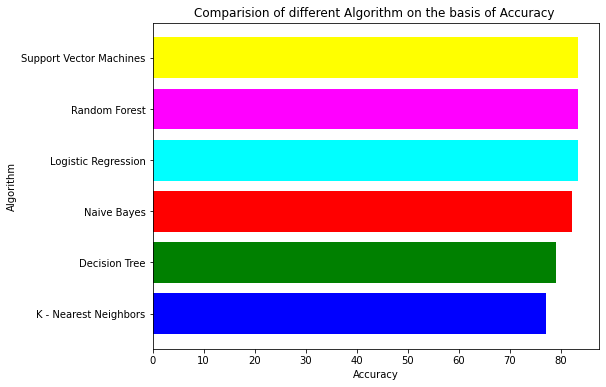

In [95]:
m=models.sort_values(by='Accuracy', ascending=True)
plt.figure(figsize=(8,6))
plt.barh(m['Model'],m['Accuracy'],color=['blue','green','red','cyan','magenta','yellow'])
plt.title('Comparision of different Algorithm on the basis of Accuracy ')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()
